In [148]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [149]:
!ls "/content/gdrive/My Drive/Omdena Pandemic"

'COVID19EconomicImpact 10Mar2020.csv'
 data
 excahnge_rates.csv
 exchange.csv
'Goal for me for this project.gdoc'
'Goals for Omdena Pandemic.gdoc'
 IDD-metadata-by-country.csv
 IDD-metadata-by-country.xlsx
 minimum_wages.gsheet
 minimum_wages_te.csv
'minimum_wages_trading economics.gsheet'
 NavTree_t2020_h_en.zip
'Omdena Pandemic Challenge Dataset Sheets.xlsx'
 t2020_10.tsv
 t2020_10.tsv.gz
 t2020_h
 trading_economics_draft.ipynb
 trading_economics_min_wages_Anju.ipynb
 wage_data_test1.ipynb
 wage_subsidy.gsheet


In [0]:
rate = "/content/gdrive/My Drive/Omdena Pandemic/excahnge_rates.csv"
drive = "/content/gdrive/My Drive/Omdena Pandemic/minimum_wages_te.csv"

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
data = pd.read_csv(rate)

In [153]:
data.head()

,Location,2019
0,Argentina,48.148
1,Australia,1.439
2,Austria,0.893
3,Belgium,0.893
4,Brazil,3.927


In [0]:
data.rename(columns={'Location':'Country','2019':"Rate"},inplace=True)

In [155]:
data.head()

,Country,Rate
0,Argentina,48.148
1,Australia,1.439
2,Austria,0.893
3,Belgium,0.893
4,Brazil,3.927


In [156]:
data.shape

(60, 2)

In [157]:
data['Country']

0                         Argentina
1                         Australia
2                           Austria
3                           Belgium
4                            Brazil
5                          Bulgaria
6                            Canada
7                             Chile
8      China (People's Republic of)
9                          Colombia
10                       Costa Rica
11                          Croatia
12                           Cyprus
13                   Czech Republic
14                          Denmark
15                          Estonia
16         Euro area (19 countries)
17    European Union (28 countries)
18                          Finland
19                           France
20                          Germany
21                           Greece
22                 Hong Kong, China
23                          Hungary
24                          Iceland
25                            India
26                        Indonesia
27                          

In [0]:
df = pd.read_csv(drive)

In [159]:
df.head()

,Country,Last,Month/Year,2020,2021,2022,CurrencyType/Occurence
0,Albania,26000.0,Dec/19,27000.0,28000.0,28000.0,ALL/Month
1,Angola,21454.1,Dec/20,21454.0,22000.0,22000.0,AOA/Month
2,Argentina,16875.0,Dec/19,16875.0,17500.0,17500.0,ARS/Month
3,Armenia,68000.0,Jul/20,60000.0,65000.0,65000.0,AMD/Month
4,Australia,740.8,Jul/19,760.0,780.0,780.0,AUD/week


In [160]:
df.shape

(999, 7)

In [161]:
df.isnull().sum()

Country                   927
Last                      927
Month/Year                927
2020                      927
2021                      927
2022                      927
CurrencyType/Occurence    927
dtype: int64

In [0]:
df= df.dropna()

In [163]:
df.shape

(72, 7)

In [0]:
df['Minimum Wage'] = df['Last']

In [0]:
df[['Month','Year']]= df['Month/Year'].str.split('/',expand=True)

In [0]:
df.Year = df.Year.apply(lambda x: '2019' if '19' in x else '2020')

In [0]:
df[['Currency','Occurrence']]= df['CurrencyType/Occurence'].str.split('/',expand=True)

In [0]:
df.Year = df.Year.astype(int)

In [169]:
df.head()

,Country,Last,Month/Year,2020,2021,2022,CurrencyType/Occurence,Minimum Wage,Month,Year,Currency,Occurrence
0,Albania,26000.0,Dec/19,27000.0,28000.0,28000.0,ALL/Month,26000.0,Dec,2019,ALL,Month
1,Angola,21454.1,Dec/20,21454.0,22000.0,22000.0,AOA/Month,21454.1,Dec,2020,AOA,Month
2,Argentina,16875.0,Dec/19,16875.0,17500.0,17500.0,ARS/Month,16875.0,Dec,2019,ARS,Month
3,Armenia,68000.0,Jul/20,60000.0,65000.0,65000.0,AMD/Month,68000.0,Jul,2020,AMD,Month
4,Australia,740.8,Jul/19,760.0,780.0,780.0,AUD/week,740.8,Jul,2019,AUD,week


In [0]:
latest_min_wage = df.drop(['Last','Month/Year','CurrencyType/Occurence','2020','2021','2022'],axis=1)

In [171]:
latest_min_wage.head()

,Country,Minimum Wage,Month,Year,Currency,Occurrence
0,Albania,26000.0,Dec,2019,ALL,Month
1,Angola,21454.1,Dec,2020,AOA,Month
2,Argentina,16875.0,Dec,2019,ARS,Month
3,Armenia,68000.0,Jul,2020,AMD,Month
4,Australia,740.8,Jul,2019,AUD,week


In [0]:
merge_data = pd.merge(data,latest_min_wage,on='Country')

In [173]:
merge_data.head()

,Country,Rate,Minimum Wage,Month,Year,Currency,Occurrence
0,Argentina,48.148,16875.00,Dec,2019,ARS,Month
1,Australia,1.439,740.80,Jul,2019,AUD,week
2,Belgium,0.893,1593.81,Mar,2020,EUR,Month
3,Brazil,3.927,1045.00,Apr,2020,BRL,Month
4,Bulgaria,1.747,286.33,Dec,2019,EUR,Month


In [174]:
merge_data.dtypes

Country          object
Rate             object
Minimum Wage    float64
Month            object
Year              int64
Currency         object
Occurrence       object
dtype: object

In [175]:
merge_data['Occurrence'].value_counts()

Month    27
Hour      8
Day       2
week      1
Name: Occurrence, dtype: int64

In [0]:
#converting based on the Occurrence to hourly min wages
def min_wage(x):
  val=0
  if (x['Occurrence'] == 'week'):
    val = x['Minimum Wage'] / 40
  elif(x['Occurrence'] == 'Month'):
    val = x['Minimum Wage'] * 12 / 52 / 40
  elif(x['Occurrence'] == 'Day'):
    val = x['Minimum Wage'] /8
  else:
    val =  x['Minimum Wage']
  return val

In [0]:
merge_data['Hourly Min Wage'] = merge_data.apply(min_wage,axis=1)

In [178]:
merge_data.head()

,Country,Rate,Minimum Wage,Month,Year,Currency,Occurrence,Hourly Min Wage
0,Argentina,48.148,16875.00,Dec,2019,ARS,Month,97.355769
1,Australia,1.439,740.80,Jul,2019,AUD,week,18.520000
2,Belgium,0.893,1593.81,Mar,2020,EUR,Month,9.195058
3,Brazil,3.927,1045.00,Apr,2020,BRL,Month,6.028846
4,Bulgaria,1.747,286.33,Dec,2019,EUR,Month,1.651904


In [0]:
merge_data['Rate'] = pd.to_numeric(merge_data['Rate'],errors='coerce')

In [180]:
merge_data.dtypes

Country             object
Rate               float64
Minimum Wage       float64
Month               object
Year                 int64
Currency            object
Occurrence          object
Hourly Min Wage    float64
dtype: object

In [0]:
#converting to Purchase dollars
def convert_dollars(x):
  val = x['Rate'] * x['Hourly Min Wage']
  return val

In [0]:
merge_data['Min Wage US dollars'] = merge_data.apply(convert_dollars,axis=1)

In [183]:
merge_data.head()

,Country,Rate,Minimum Wage,Month,Year,Currency,Occurrence,Hourly Min Wage,Min Wage US dollars
0,Argentina,48.148,16875.00,Dec,2019,ARS,Month,97.355769,4687.485577
1,Australia,1.439,740.80,Jul,2019,AUD,week,18.520000,26.650280
2,Belgium,0.893,1593.81,Mar,2020,EUR,Month,9.195058,8.211187
3,Brazil,3.927,1045.00,Apr,2020,BRL,Month,6.028846,23.675279
4,Bulgaria,1.747,286.33,Dec,2019,EUR,Month,1.651904,2.885876


In [0]:
merge_data['Min Wage US dollars'] = round(merge_data['Min Wage US dollars'],2)

In [190]:
merge_data.head(10)

,Country,Rate,Minimum Wage,Month,Year,Currency,Occurrence,Hourly Min Wage,Min Wage US dollars
0,Argentina,48.148,16875.00,Dec,2019,ARS,Month,97.355769,4687.49
1,Australia,1.439,740.80,Jul,2019,AUD,week,18.520000,26.65
2,Belgium,0.893,1593.81,Mar,2020,EUR,Month,9.195058,8.21
3,Brazil,3.927,1045.00,Apr,2020,BRL,Month,6.028846,23.68
4,Bulgaria,1.747,286.33,Dec,2019,EUR,Month,1.651904,2.89
5,Canada,1.327,14.00,Dec,2019,CAD,Hour,14.000000,18.58
6,Chile,702.897,320500.00,Jan,2020,CLP,Month,1849.038462,1299683.59
7,Costa Rica,587.295,5376.28,Mar,2020,points,None,5376.280000,3157462.36
8,Croatia,6.623,546.07,Mar,2020,EUR,Month,3.150404,20.87
9,Czech Republic,22.932,518.97,Dec,2019,EUR,Month,2.994058,68.66


In [0]:
y = merge_data['Hourly Min Wage']
x= merge_data['Country']
hue = merge_data['Year']

<BarContainer object of 39 artists>

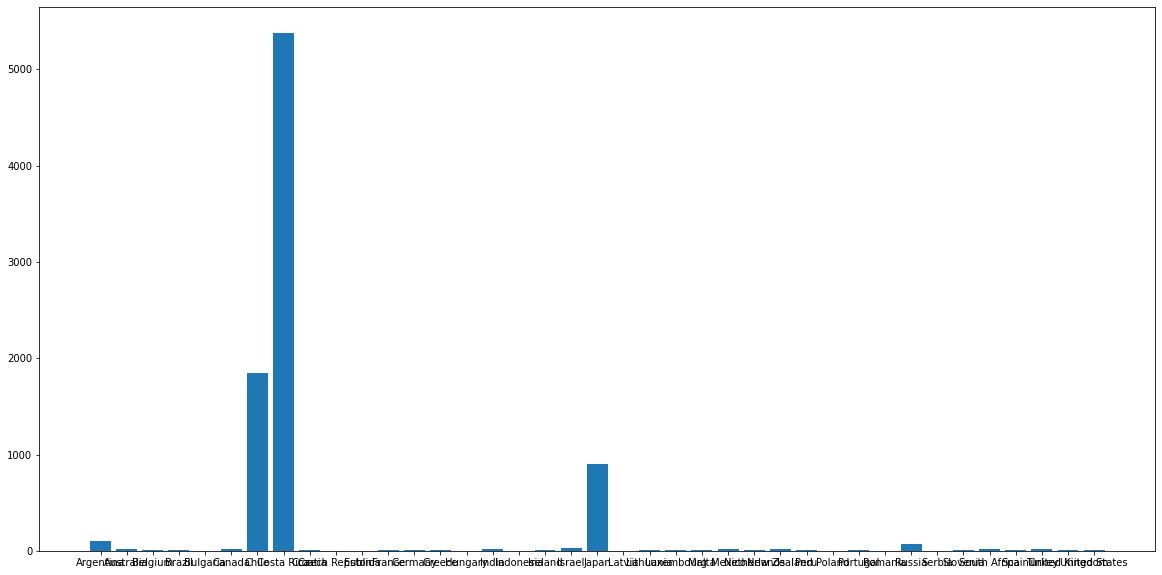

In [192]:
plt.figure(figsize=(20, 10))
plt.bar(x, y)

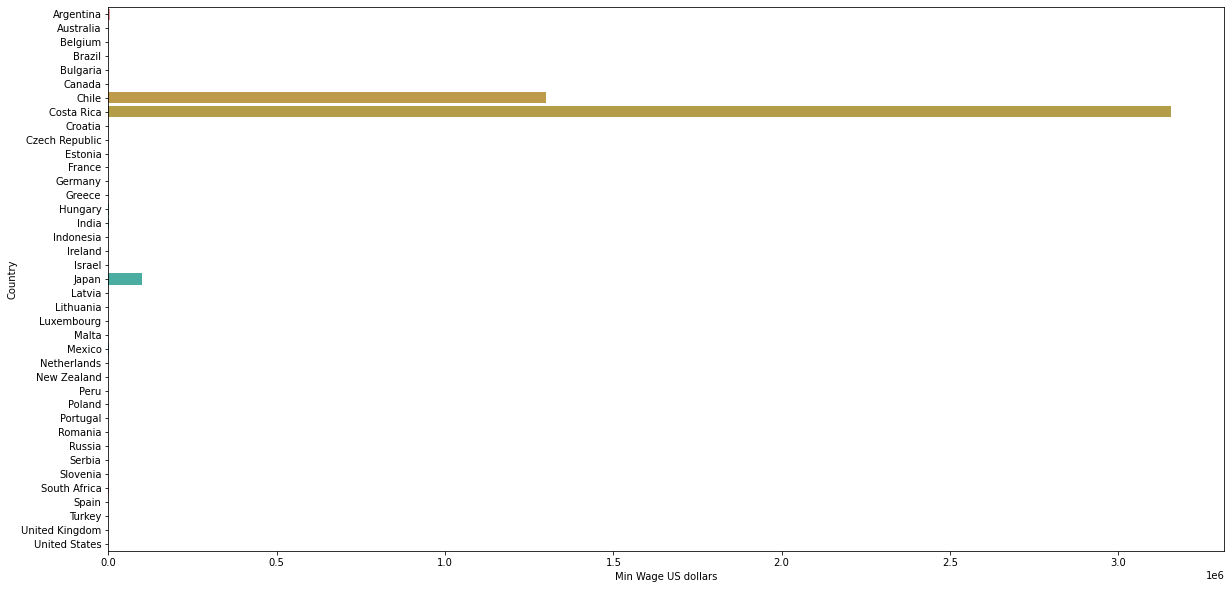

In [193]:
plt.figure(figsize=(20, 10))
sns.barplot(y="Country", x="Min Wage US dollars", data=merge_data)

In [0]:
#chile,japan and costa rica seem to be an issue so dropping
merge_data = merge_data[merge_data['Country']!= 'Chile']

In [0]:
merge_data = merge_data[merge_data['Country']!= 'Costa Rica']

In [0]:
merge_data = merge_data[merge_data['Country']!= 'Japan']

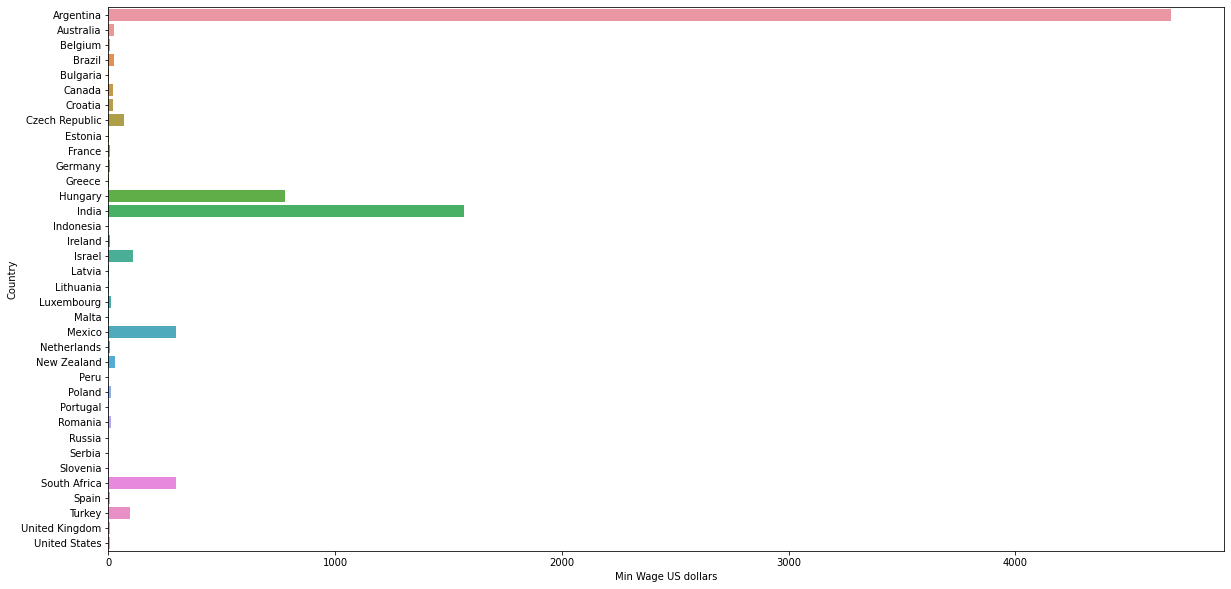

In [198]:
plt.figure(figsize=(20, 10))
sns.barplot(y="Country", x="Min Wage US dollars", data=merge_data)